# [Matplotlib](https://matplotlib.org)

Matplotlib è una libreria utilizzata per creare visualizzazioni statiche, animate ed interagibili in Python.

In [1]:
# L'opzione -y serve per accettare eventuali prompt del programma
# di installazione
import sys
!conda install matplotlib -y --prefix {sys.prefix}

Retrieving notices: ...working... done
Channels:
 - defaults
 - conda-forge
Platform: linux-64
Solving environment: done

# All requested packages already installed.



In [2]:
import matplotlib.pyplot as plt

Matplotlib mostra i dati in una `Figure`, la quale a sua volta può contenere uno o più `Axes`, ovvero un'area in cui è possibile specificare punti in termini di coordinate `x` e `y`. La funzione `pyplot.subplots` permette di creare facilmente questi due oggetti.

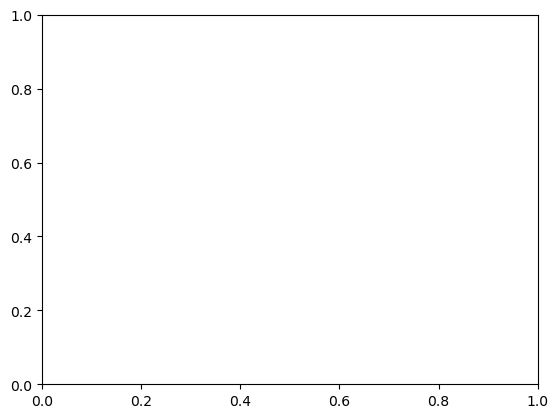

In [8]:
fig, ax = plt.subplots()
plt.show()

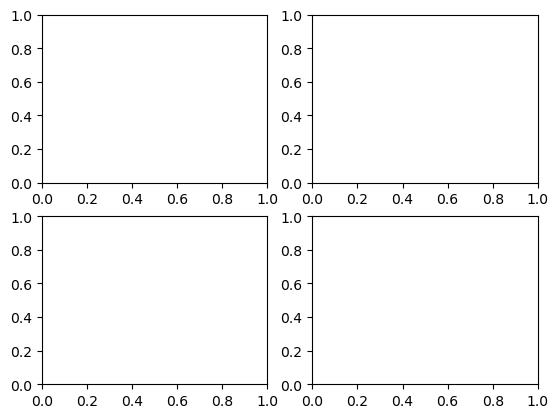

In [9]:
fig, ax = plt.subplots(2, 2)
plt.show()

In [7]:
ax.shape

(2, 2)

## Un solo `Axes`

Nel caso di una figura con un solo `Axes` possiamo anche usare il comando `plt.figure()` che crea una `Figure` con un solo `Axes` su cui tutti i successivi plot verranno disegnati.

### [`plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

`plt.plot()` permette di disegnare un grafico con linee e punti, fornendo  le coordinate x e y dei punti.

Di deafult viene disegnata una linea spezzata che congiunge i punti

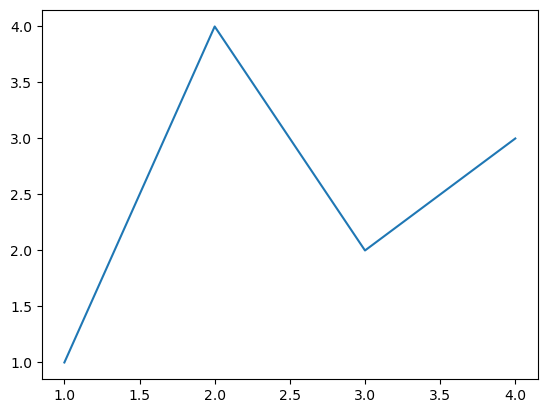

In [12]:
plt.figure()
x = [1, 2, 3, 4]
y = [1, 4, 2, 3]
plt.plot(x, y)
plt.show()

Si può inoltre specificare un simbolo per i punti:

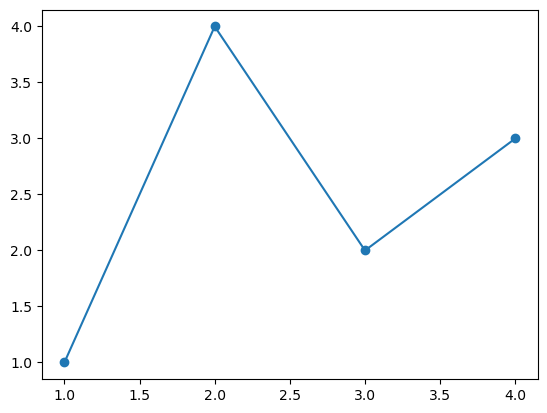

In [13]:
plt.figure()
plt.plot(x, y, marker = 'o')
plt.show()

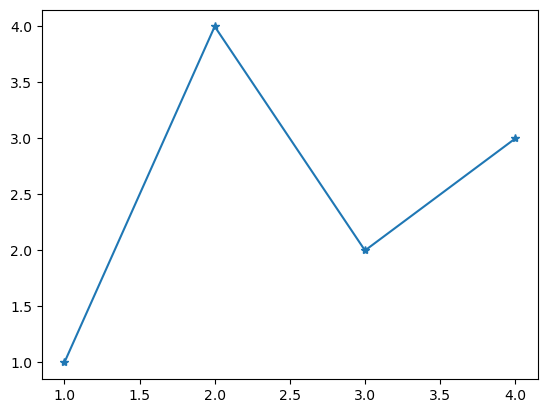

In [15]:
plt.figure()
plt.plot(x, y, marker = '*')
plt.show()

Come anche lo stile delle linee

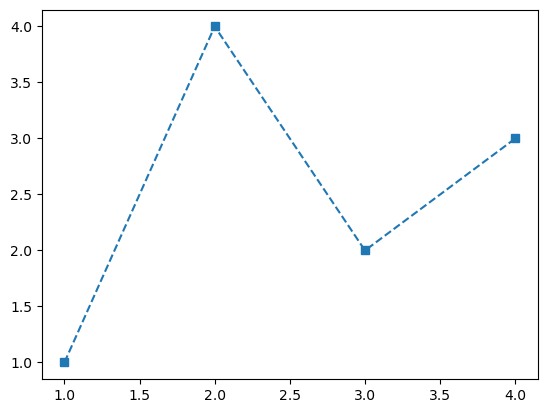

In [19]:
plt.figure()
plt.plot(x, y, marker = 's', linestyle = '--')
plt.show()

Le varie funzioni di matplotlib hanno tantissimi parametri per poter personlizzare i grafici secondo le più diverse esigenze. 

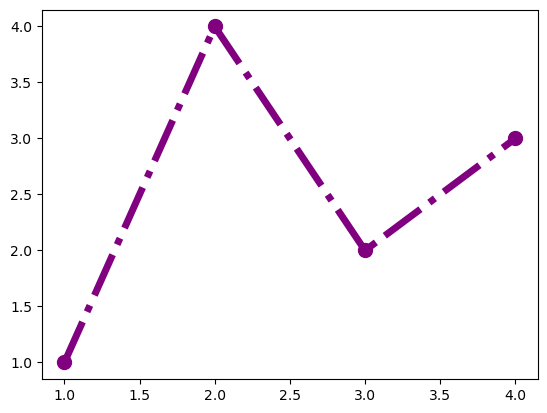

In [22]:
plt.figure()
plt.plot(x, 
         y, 
         marker = 'o',       # Marker punto
         linestyle = '-.',   # Linea punto
         color = 'purple',   # Colore verde
         linewidth = 5,      # Spessore linea 5
         markersize = 10)    # Dimensione del marker 10
plt.show()

Finché non si crea una nuova `Figure` tutti i plot vengono conferiti a quella precedente

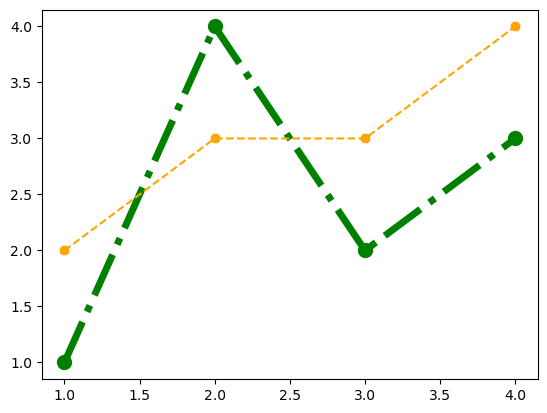

In [23]:
plt.figure()
plt.plot(x, 
        y, 
        marker = 'o', 
        linestyle = '-.',
        color = 'green',
        linewidth = 5,
        markersize = 10)
plt.plot(x,
        [2, 3, 3, 4],
        marker = '8',
        linestyle = '--',
        color = 'orange')
plt.show()

Chiaramente spesso è utile urilizzare matplotlib per visulizzare i risultati ottenuti con dei calcoli di NumPy per esempio.

In [24]:
import numpy as np

In [25]:
n = np.arange(0, 5, 0.2)

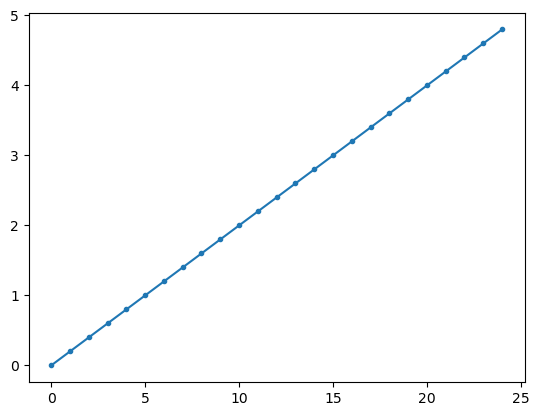

In [26]:
plt.figure()
plt.plot(n, marker = '.') # n è interpretato come y
                          # x di default viene presno come [0, ..., len(n)]
plt.show()

Quando aggiungiamo più plot allo stesso `Axes` vengono automaticamente rappresentati con colori diversi

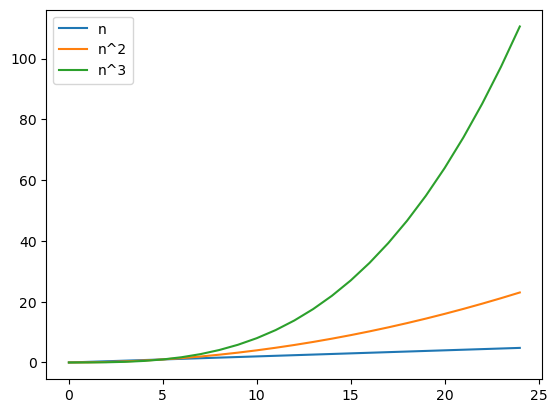

In [28]:
plt.figure()
plt.plot(n, label = "n")
plt.plot(n**2, label = "n^2")
plt.plot(n**3, label = "n^3")
plt.legend() # La legenda viene messa dove sta meglio
plt.show()

### [`scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

L'altro tipo di grafico molto usato è lo scatter plot o diagramma a dispersione. È utilizzato per rappresentare punti nel piano.

In [30]:
x = np.arange(50)
y = x + 10 * np.random.randn(50) # Numero casuale gaussiano N(0,1)

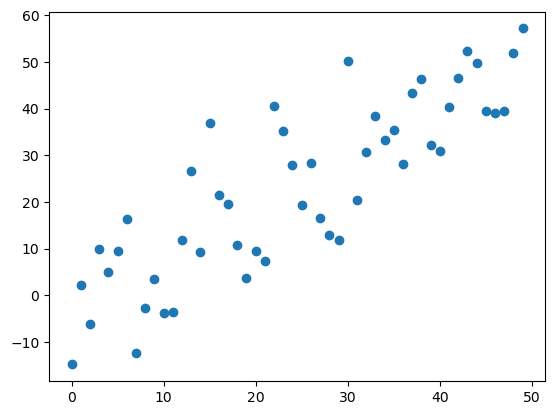

In [31]:
plt.figure()
plt.scatter(x, y)
plt.show()

Anche in questo caso vi sono ifinite possibilità di personalizzazione

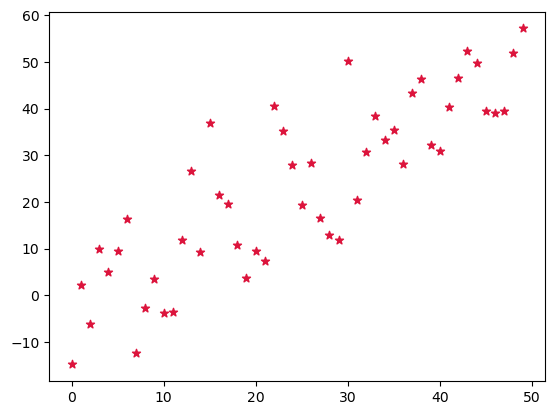

In [32]:
plt.figure()
plt.scatter(x, y, marker = "*", color = "crimson") # Un unico valore -> tutti i punti colorati uguali
plt.show()

Ad ogni punto si possono anche assegnare proprietà diverse:

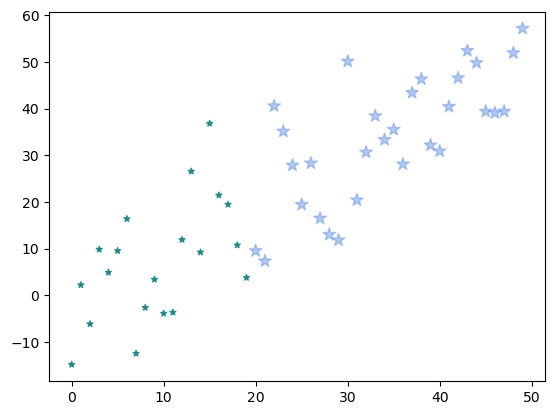

In [34]:
plt.figure()
plt.scatter(x, y, marker = "*", 
            alpha = [0.8]*20 + [0.5]*30,
            s = [20]*20 + [90]*30,
            c = ["teal"]*20 + ["cornflowerblue"]*30)
plt.show()

In [35]:
c = np.random.randint(0, 50, 50)
s = np.abs(np.random.randn(50)) * 100

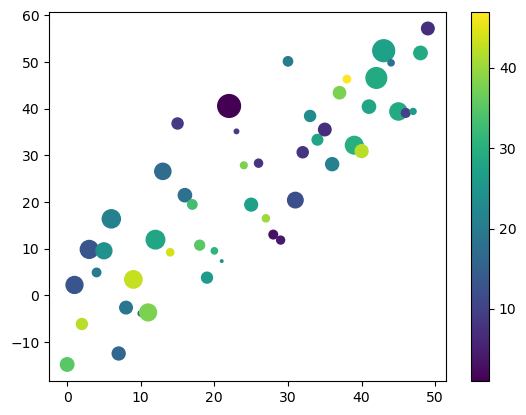

In [37]:
plt.figure()
plt.scatter(x, y, 
            c = c, # colore random 
            s = s) # dimensione random
plt.colorbar() # Aggiunge la barra dei colori al grafico 
plt.show()

### [`bar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

L'ultimo tipo di plot che vediamo è il diagramma a barre o bar plot. Per questo occore specificare le barre e le loro altezze.

In [39]:
gruppi = ['gruppo 1', 'gruppo 2', 'gruppo 3']
valori = [40, 10, 100]

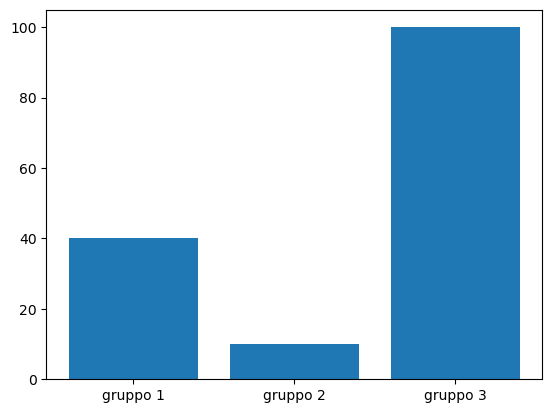

In [40]:
plt.figure()
plt.bar(gruppi, height = valori)
plt.show()

Anche in questo caso vi sono moltissime possibilità di personalizzazione.

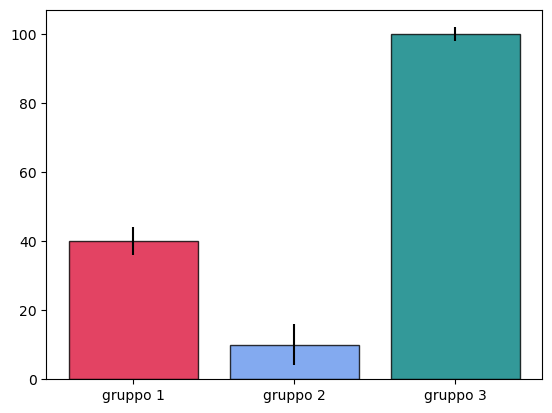

In [41]:
plt.figure()
plt.bar(gruppi, height = valori,
        color = ["crimson", "cornflowerblue", "teal"],
        edgecolor = "black",     # Colore del contorno
        yerr = [4, 6, 2],        # Altezze delle barre d'errore
        alpha = 0.8,             # Opacità delle barre
       )
plt.show()

Possiamo poi specificare le etichette degli assi e un titolo per completare la figura

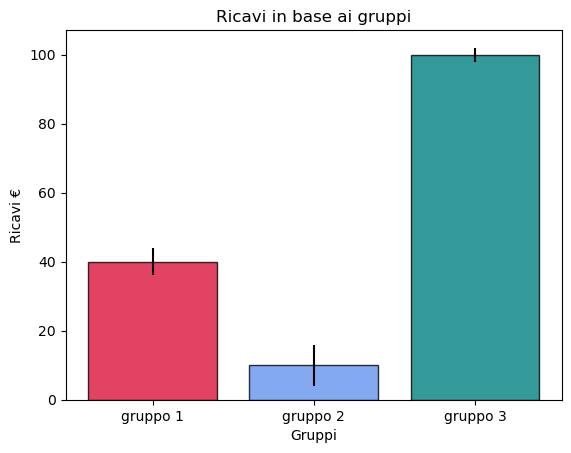

In [42]:
plt.figure()
plt.bar(gruppi, height = valori,
        color = ["crimson", "cornflowerblue", "teal"],
        edgecolor = "black",
        yerr = [4, 6, 2],
        alpha = 0.8,
       )
plt.xlabel("Gruppi")
plt.ylabel("Ricavi €")
plt.title("Ricavi in base ai gruppi")
plt.show()

## Multipli `Axes`

Quando vogliamo specificare più grafici in una sola `Figure` dobbiamo unsare `subplots` che ci permette di creare una griglia di `Axes` con un certo numero di righe e colonne.

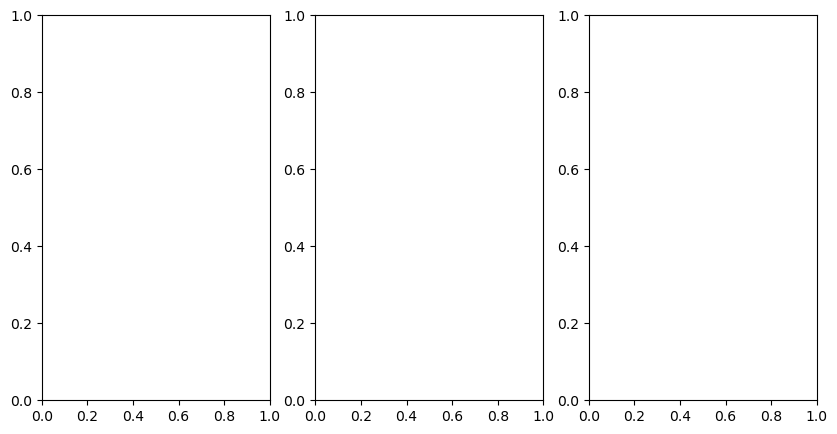

In [43]:
# Una riga e tre colonne
fig, ax = plt.subplots(1, 3, figsize = (10, 5))

Per accedere ad ognuno degli assi possiamo usare la variabile `ax` che è un vettore della stessa shape del numero righe e numero colonne del subplot.

In [44]:
ax.shape

(3,)

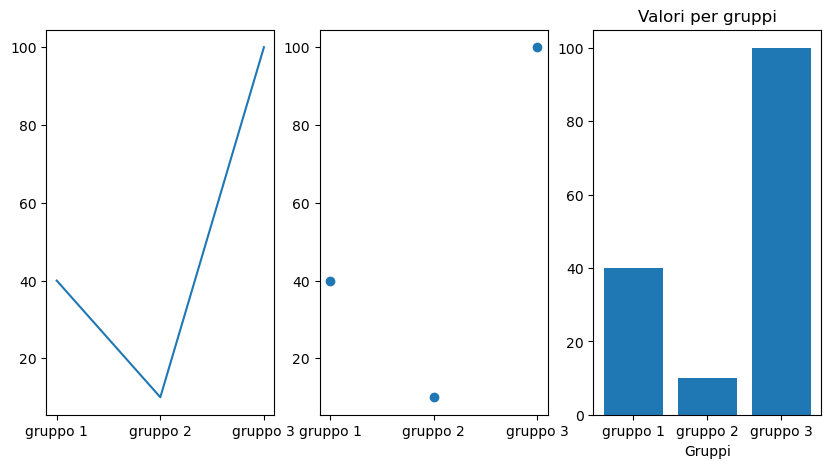

In [48]:
fig, ax = plt.subplots(1, 3, figsize = (10, 5))

ax[0].plot(gruppi, valori)
ax[1].scatter(gruppi, valori)
ax[2].bar(gruppi, valori)
ax[2].set_xlabel("Gruppi")
ax[2].set_title("Valori per gruppi")

plt.show()

## Esercizi

Generare quattro diversi campioni di dimensione 50 estratti da quattro distribuzioni normali 2d con medie pari a [-1, 4], [2, -2], [3, 6] e [-1, -3] e matrici di varianza covarianza pari all'identità 2x2.

Rappresentare i quatto campioni come punti nel piano:
- prima in un unica figura
- poi in quattro assi di una stessa figura

Evidenziare i gruppi con colori diversi, mettendo in evidenza la media campionaria con un simbolo diverso e più grande.

In [56]:
# Genereare i quatto campioni
c1x = -1 + np.random.randn(50)
c1y = 4 + np.random.randn(50)

c2x = 2 + np.random.randn(50)
c2y = -2 + np.random.randn(50)

c3x = 3 + np.random.randn(50)
c3y = 6 + np.random.randn(50)

c4x = -1 + np.random.randn(50)
c4y = -3 + np.random.randn(50)

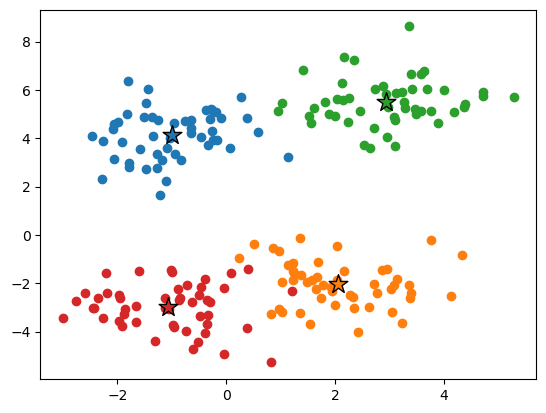

In [67]:
plt.figure()
plt.scatter(c1x, c1y, label = "Campione 1")
plt.scatter([c1x.mean()], [c1y.mean()], s = 200, 
            marker = '*', color = "C0", edgecolor = "black")
plt.scatter(c2x, c2y, label = "Campione 2")
plt.scatter([c2x.mean()], [c2y.mean()], s = 200, 
            marker = '*', color = "C1", edgecolor = "black")
plt.scatter(c3x, c3y, label = "Campione 3")
plt.scatter([c3x.mean()], [c3y.mean()], s = 200, 
            marker = '*', color = "C2", edgecolor = "black")
plt.scatter(c4x, c4y, label = "Campione 4")
plt.scatter([c4x.mean()], [c4y.mean()], s = 200, 
            marker = '*', color = "C3", edgecolor = "black")
plt.show()

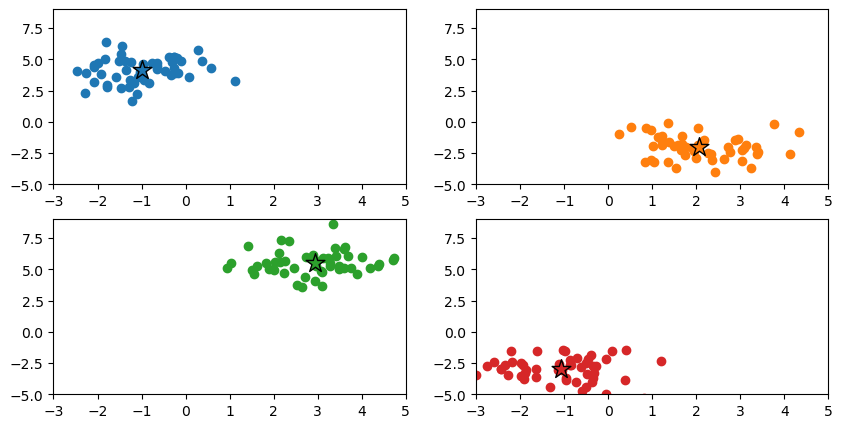

In [80]:
fig, ax = plt.subplots(2, 2, figsize = (10, 5))
ax[0, 0].scatter(c1x, c1y, label = "Campione 1")
ax[0, 0].scatter([c1x.mean()], [c1y.mean()], s = 200, 
            marker = '*', color = "C0", edgecolor = "black")
ax[0, 0].set_xlim([-3, 5])
ax[0, 0].set_ylim([-5, 9])

ax[0, 1].scatter(c2x, c2y, label = "Campione 2", color = "C1")
ax[0, 1].scatter([c2x.mean()], [c2y.mean()], s = 200, 
            marker = '*', color = "C1", edgecolor = "black")
ax[0, 1].set_xlim([-3, 5])
ax[0, 1].set_ylim([-5, 9])

ax[1, 0].scatter(c3x, c3y, label = "Campione 3", color = "C2")
ax[1, 0].scatter([c3x.mean()], [c3y.mean()], s = 200, 
            marker = '*', color = "C2", edgecolor = "black")
ax[1, 0].set_xlim([-3, 5])
ax[1, 0].set_ylim([-5, 9])

ax[1, 1].scatter(c4x, c4y, label = "Campione 4", color = "C3")
ax[1, 1].scatter([c4x.mean()], [c4y.mean()], s = 200, 
            marker = '*', color = "C3", edgecolor = "black")
ax[1, 1].set_xlim([-3, 5])
ax[1, 1].set_ylim([-5, 9])
plt.show()

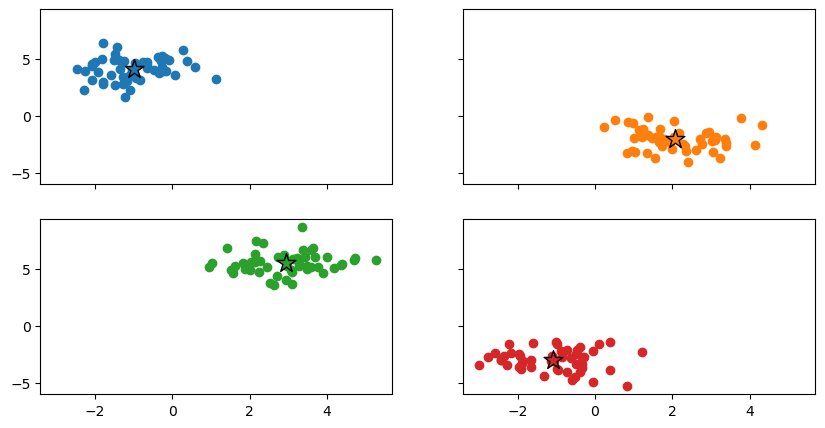

In [81]:
fig, ax = plt.subplots(2, 2, figsize = (10, 5), sharex = True, sharey = True)
ax[0, 0].scatter(c1x, c1y, label = "Campione 1")
ax[0, 0].scatter([c1x.mean()], [c1y.mean()], s = 200, 
            marker = '*', color = "C0", edgecolor = "black")

ax[0, 1].scatter(c2x, c2y, label = "Campione 2", color = "C1")
ax[0, 1].scatter([c2x.mean()], [c2y.mean()], s = 200, 
            marker = '*', color = "C1", edgecolor = "black")

ax[1, 0].scatter(c3x, c3y, label = "Campione 3", color = "C2")
ax[1, 0].scatter([c3x.mean()], [c3y.mean()], s = 200, 
            marker = '*', color = "C2", edgecolor = "black")

ax[1, 1].scatter(c4x, c4y, label = "Campione 4", color = "C3")
ax[1, 1].scatter([c4x.mean()], [c4y.mean()], s = 200, 
            marker = '*', color = "C3", edgecolor = "black")
plt.show()

La matrice `X` contiene le misurazioni di 10 titoli azionari misurati ogni ora per 5 settimane (ogni riga è un titolo). 

Plottare l'andamento di ogni titolo usando uno stesso colore, sovrapporre poi l'andamento medio (ovvero l'andamento che per ogni periodo vale la media dei titoli in quel periodo) con il colore rosso e una linea di spessore 2.

In [ ]:
with open("data/stocks.dat", "rb") as file:
    X = pickle.load(file)

Il dizionario `regioni` associa ad ogni regione italiana la sua popolazione.
Disegnare un grafico a barre della popolazione per regione colorando le barre a seconda del ragguppamento:
- **Nord:** Valle d'aosta, Piemonte, Liguria, Lombardia, Veneto, Trentito-Alto Adige, Friuli Venezia Giulia, Emilia-Romagna
- **Centro:** Toscana, Marche, Umbria, Lazio
- **Sud:** Abruzzo, Molise, Campania, Basilicata, Calabria, Puglia
- **Isole:** Sicilia, Sardegna

*Hint:* Usare `barh` al posto di `bar` e l'attributo `width` al posto di `height`.

In [ ]:
with open("data/regioni.dat", "rb") as file:
    regioni = pickle.load(file)